In [144]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly
import plotly.graph_objs as go
import plotly.plotly as py
print plotly.__version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import offline
import numpy as np
import math
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

plotly.offline.init_notebook_mode(connected=True)
init_notebook_mode(connected=True)

2.0.14


In [145]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats

In [146]:
#Reading the CSV file
FIFA = pd.read_csv('/Users/rushabh/Rushabh/Untitled Folder/Datasets/FIFA.csv')

In [147]:
FIFA.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [148]:
print FIFA.shape
print "---------------"
print FIFA.dtypes
print "---------------"

(17588, 53)
---------------
Name                   object
Nationality            object
National_Position      object
National_Kit          float64
Club                   object
Club_Position          object
Club_Kit              float64
Club_Joining           object
Contract_Expiry       float64
Rating                  int64
Height                 object
Weight                 object
Preffered_Foot         object
Birth_Date             object
Age                     int64
Preffered_Position     object
Work_Rate              object
Weak_foot               int64
Skill_Moves             int64
Ball_Control            int64
Dribbling               int64
Marking                 int64
Sliding_Tackle          int64
Standing_Tackle         int64
Aggression              int64
Reactions               int64
Attacking_Position      int64
Interceptions           int64
Vision                  int64
Composure               int64
Crossing                int64
Short_Pass              int64
Long_Pass   

In [149]:
FIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
Name                  17588 non-null object
Nationality           17588 non-null object
National_Position     1075 non-null object
National_Kit          1075 non-null float64
Club                  17588 non-null object
Club_Position         17587 non-null object
Club_Kit              17587 non-null float64
Club_Joining          17587 non-null object
Contract_Expiry       17587 non-null float64
Rating                17588 non-null int64
Height                17588 non-null object
Weight                17588 non-null object
Preffered_Foot        17588 non-null object
Birth_Date            17588 non-null object
Age                   17588 non-null int64
Preffered_Position    17588 non-null object
Work_Rate             17588 non-null object
Weak_foot             17588 non-null int64
Skill_Moves           17588 non-null int64
Ball_Control          17588 non-null int64
Dribbling      

In [150]:
#Counting the number of null values
FIFA.isnull().sum()

Name                      0
Nationality               0
National_Position     16513
National_Kit          16513
Club                      0
Club_Position             1
Club_Kit                  1
Club_Joining              1
Contract_Expiry           1
Rating                    0
Height                    0
Weight                    0
Preffered_Foot            0
Birth_Date                0
Age                       0
Preffered_Position        0
Work_Rate                 0
Weak_foot                 0
Skill_Moves               0
Ball_Control              0
Dribbling                 0
Marking                   0
Sliding_Tackle            0
Standing_Tackle           0
Aggression                0
Reactions                 0
Attacking_Position        0
Interceptions             0
Vision                    0
Composure                 0
Crossing                  0
Short_Pass                0
Long_Pass                 0
Acceleration              0
Speed                     0
Stamina             

In [151]:
#As the below 2 columns contain alot of null values, I shall drop them
FIFA.drop(['National_Position','National_Kit'], inplace=True, axis=1)

In [152]:
FIFA.dtypes

Name                   object
Nationality            object
Club                   object
Club_Position          object
Club_Kit              float64
Club_Joining           object
Contract_Expiry       float64
Rating                  int64
Height                 object
Weight                 object
Preffered_Foot         object
Birth_Date             object
Age                     int64
Preffered_Position     object
Work_Rate              object
Weak_foot               int64
Skill_Moves             int64
Ball_Control            int64
Dribbling               int64
Marking                 int64
Sliding_Tackle          int64
Standing_Tackle         int64
Aggression              int64
Reactions               int64
Attacking_Position      int64
Interceptions           int64
Vision                  int64
Composure               int64
Crossing                int64
Short_Pass              int64
Long_Pass               int64
Acceleration            int64
Speed                   int64
Stamina   

In [153]:
FIFA.columns

Index([u'Name', u'Nationality', u'Club', u'Club_Position', u'Club_Kit',
       u'Club_Joining', u'Contract_Expiry', u'Rating', u'Height', u'Weight',
       u'Preffered_Foot', u'Birth_Date', u'Age', u'Preffered_Position',
       u'Work_Rate', u'Weak_foot', u'Skill_Moves', u'Ball_Control',
       u'Dribbling', u'Marking', u'Sliding_Tackle', u'Standing_Tackle',
       u'Aggression', u'Reactions', u'Attacking_Position', u'Interceptions',
       u'Vision', u'Composure', u'Crossing', u'Short_Pass', u'Long_Pass',
       u'Acceleration', u'Speed', u'Stamina', u'Strength', u'Balance',
       u'Agility', u'Jumping', u'Heading', u'Shot_Power', u'Finishing',
       u'Long_Shots', u'Curve', u'Freekick_Accuracy', u'Penalties', u'Volleys',
       u'GK_Positioning', u'GK_Diving', u'GK_Kicking', u'GK_Handling',
       u'GK_Reflexes'],
      dtype='object')

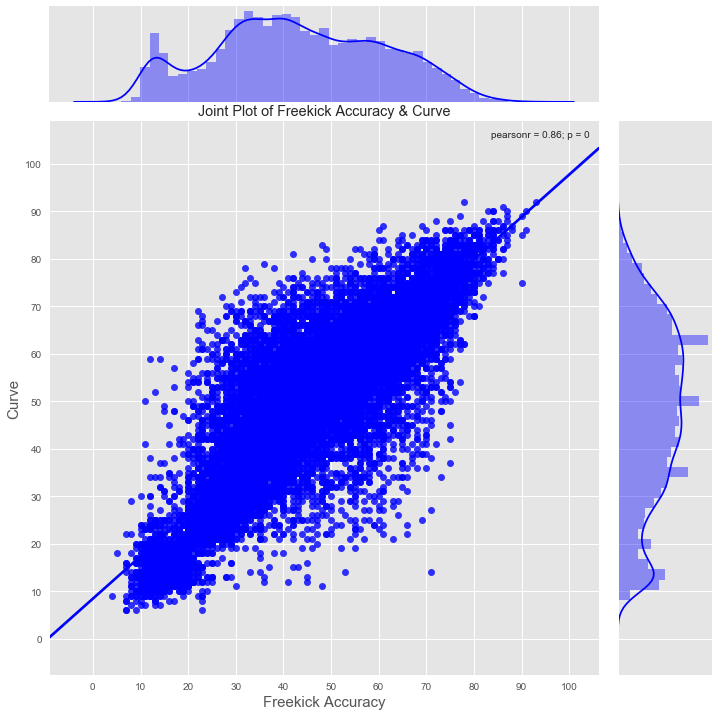

In [154]:
#As I've played FIFA alot, I know that Freekick_Accuracy would be closely related to Curve.
#The Pearson Correlation coefficient proves it below with a value of 0.86

sns.jointplot(x='Freekick_Accuracy',y='Curve', data=FIFA, size=10, dropna=True, color='blue', kind=
            'reg')
plt.title('Joint Plot of Freekick Accuracy & Curve')
plt.xlabel('Freekick Accuracy', fontsize=15)
plt.ylabel('Curve', fontsize=15)
ticks=[0,10,20,30,40,50,60,70,80,90,100]
plt.xticks(ticks)
plt.yticks(ticks)
plt.show()

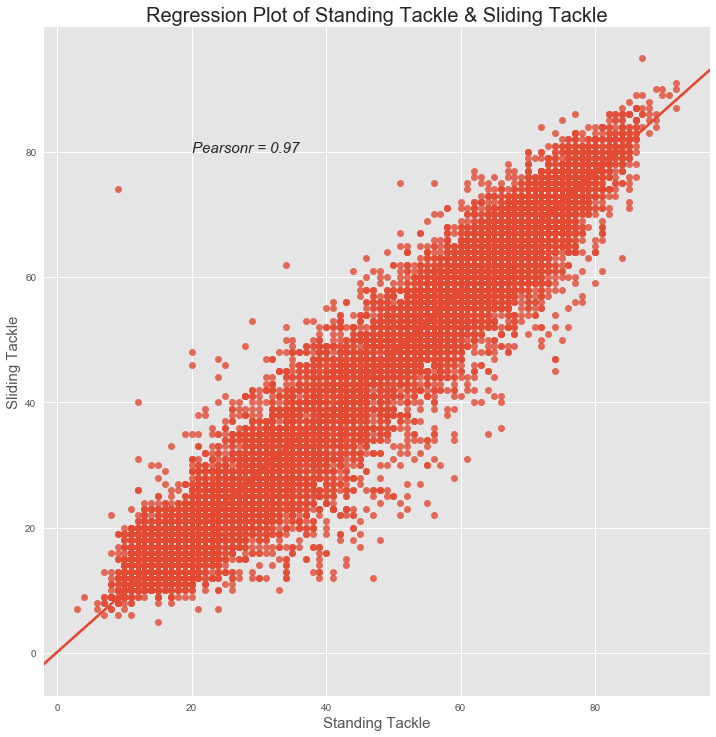

In [155]:
#This is just the basic regression plot 
#The Pearson Correlation coefficient proves it below with a value of 0.86

sns.lmplot(x='Standing_Tackle',y='Sliding_Tackle', data=FIFA, size=10)
cc=pearsonr(FIFA['Standing_Tackle'], FIFA['Sliding_Tackle'])
cc="Pearsonr = " + format(cc[0], '.2f')
plt.text(20,80,cc, fontsize=15, style='italic')
plt.title("Regression Plot of Standing Tackle & Sliding Tackle", fontsize=20)
plt.xlabel("Standing Tackle", fontsize=15)
plt.ylabel("Sliding Tackle", fontsize=15)
plt.show()

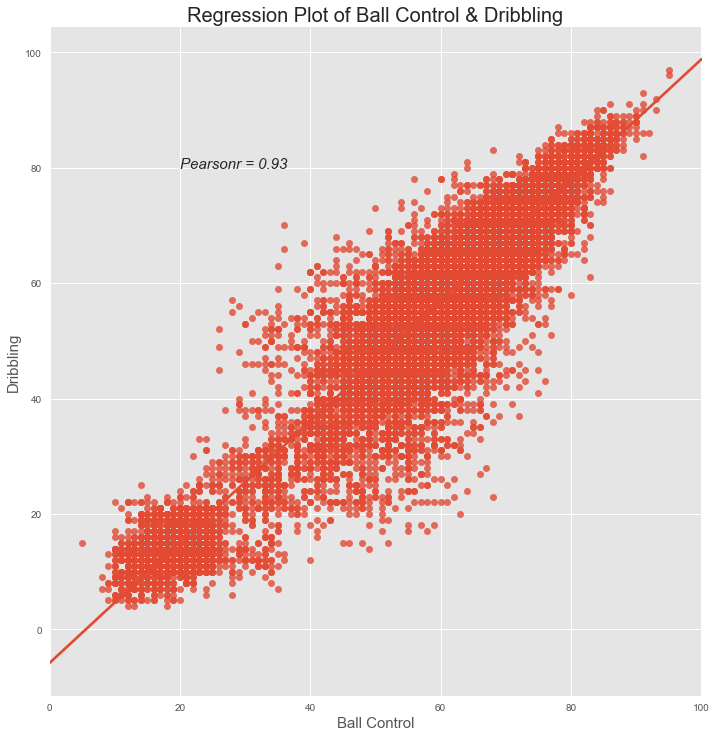

In [156]:
sns.lmplot(x='Ball_Control',y='Dribbling', data=FIFA, size=10)
cc=pearsonr(FIFA['Ball_Control'], FIFA['Dribbling'])
cc="Pearsonr = " + format(cc[0], '.2f')
plt.text(20,80,cc, fontsize=15, style='italic')
plt.title("Regression Plot of Ball Control & Dribbling", fontsize=20)
plt.xlabel("Ball Control", fontsize=15)
plt.ylabel("Dribbling", fontsize=15)
plt.show()

In [157]:
FIFA.columns

Index([u'Name', u'Nationality', u'Club', u'Club_Position', u'Club_Kit',
       u'Club_Joining', u'Contract_Expiry', u'Rating', u'Height', u'Weight',
       u'Preffered_Foot', u'Birth_Date', u'Age', u'Preffered_Position',
       u'Work_Rate', u'Weak_foot', u'Skill_Moves', u'Ball_Control',
       u'Dribbling', u'Marking', u'Sliding_Tackle', u'Standing_Tackle',
       u'Aggression', u'Reactions', u'Attacking_Position', u'Interceptions',
       u'Vision', u'Composure', u'Crossing', u'Short_Pass', u'Long_Pass',
       u'Acceleration', u'Speed', u'Stamina', u'Strength', u'Balance',
       u'Agility', u'Jumping', u'Heading', u'Shot_Power', u'Finishing',
       u'Long_Shots', u'Curve', u'Freekick_Accuracy', u'Penalties', u'Volleys',
       u'GK_Positioning', u'GK_Diving', u'GK_Kicking', u'GK_Handling',
       u'GK_Reflexes'],
      dtype='object')

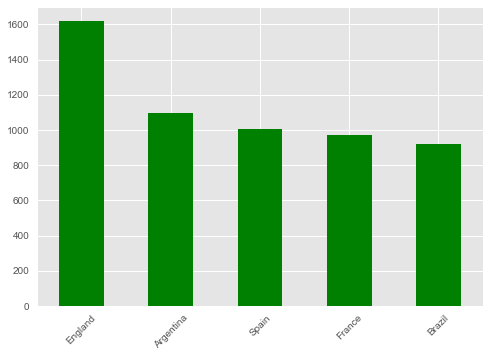

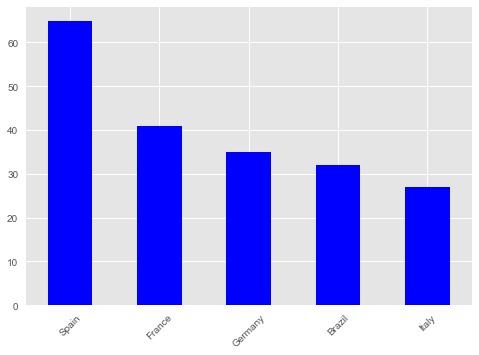

In [158]:
#This is the count of players from the top 5 countries
FIFA.Nationality.value_counts().head().plot.bar(color='green')
plt.xticks(rotation=45)
plt.show()

#Lets see where the top players come from

FIFA.Nationality[FIFA.Rating>80].value_counts().head().plot.bar(color='blue')
plt.xticks(rotation=45)
plt.show()

Here, we can see see that even if England has the most number of players it has only a handful of good players.
Most players with overall greater than 80 come from Spain and then France.

In [159]:
numerical_columns = FIFA.loc[:,'Weak_foot':'Volleys']

In [160]:
numerical_columns.corr()

,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
Weak_foot,1.000000,0.336958,0.367495,0.363454,0.026852,0.025792,0.043587,0.134230,0.207241,0.354796,...,0.306025,0.064738,0.190986,0.335000,0.362094,0.365733,0.359143,0.345879,0.340888,0.366717
Skill_Moves,0.336958,1.000000,0.727139,0.762636,0.032755,0.042994,0.070801,0.230479,0.223310,0.719592,...,0.637384,0.035216,0.391677,0.640205,0.715237,0.680452,0.689282,0.634878,0.662117,0.701030
Ball_Control,0.367495,0.727139,1.000000,0.931120,0.355324,0.356944,0.391612,0.543189,0.425070,0.855502,...,0.695534,0.172861,0.658152,0.829920,0.781241,0.831864,0.832026,0.763334,0.767824,0.789309
Dribbling,0.363454,0.762636,0.931120,1.000000,0.228470,0.243221,0.269953,0.426437,0.349176,0.888393,...,0.754682,0.117423,0.548294,0.795026,0.817036,0.836086,0.840067,0.750012,0.765258,0.804638
Marking,0.026852,0.032755,0.355324,0.228470,1.000000,0.959955,0.960271,0.708530,0.218089,0.088991,...,0.085643,0.258597,0.546814,0.219037,-0.096165,0.116512,0.206373,0.233285,0.062812,0.013446
Sliding_Tackle,0.025792,0.042994,0.356944,0.243221,0.959955,1.000000,0.971731,0.702742,0.200716,0.097394,...,0.103458,0.254882,0.523804,0.217374,-0.098868,0.117080,0.216781,0.241047,0.059250,0.015051
Standing_Tackle,0.043587,0.070801,0.391612,0.269953,0.960271,0.971731,1.000000,0.728134,0.230010,0.130880,...,0.110566,0.255081,0.555309,0.256714,-0.058740,0.156769,0.246998,0.274578,0.096380,0.053355
Aggression,0.134230,0.230479,0.543189,0.426437,0.708530,0.702742,0.728134,1.000000,0.390543,0.371668,...,0.239315,0.352217,0.677682,0.496362,0.230808,0.386339,0.395955,0.402466,0.329950,0.318463
Reactions,0.207241,0.223310,0.425070,0.349176,0.218089,0.200716,0.230010,0.390543,1.000000,0.373958,...,0.283687,0.260476,0.305187,0.405056,0.316947,0.408653,0.405653,0.390712,0.333876,0.382836
Attacking_Position,0.354796,0.719592,0.855502,0.888393,0.088991,0.097394,0.130880,0.371668,0.373958,1.000000,...,0.690804,0.116543,0.532473,0.795268,0.880514,0.850919,0.804651,0.727236,0.798160,0.841625


In [161]:
FIFA_test = FIFA.copy()

My first approach was to just use the numerical columns as the attributes and the 'rating' as the target variable. 

In [162]:
Y = FIFA_test.loc[:,'Rating']
X = FIFA_test.loc[:,'Weak_foot':'Volleys']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
LR1 = LinearRegression()
LR1.fit(X_train, y_train)
y_pred = LR1.predict(X_test)
print LR1.score(X_test, y_test)

0.757282440547


Not being satisfied with this accuracy, I thought of removing the outliers and seeing what accuracy I get then.

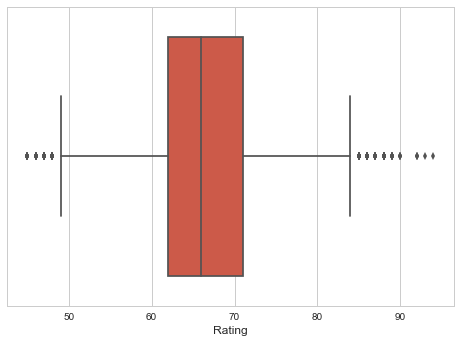

In [163]:
sns.set_style("whitegrid")
sns.boxplot(x="Rating", data=FIFA)
plt.show()

In [164]:
QR1 = stats.scoreatpercentile(FIFA.Rating, 25)
QR2 = stats.scoreatpercentile(FIFA.Rating, 50)
QR3 = stats.scoreatpercentile(FIFA.Rating, 75)
IQR = QR3-QR1
LW  = QR1 - 1.5*IQR
UW  = QR3 + 1.5*IQR
print LW,UW

48.5 84.5


48.5 and 84.5 are the lower and upper whiskers, respectively. Anything not between these ranges would be considered an outlier.

In [165]:
FIFA_wo_ol = FIFA_test[FIFA_test['Rating']>LW]
FIFA_wo_ol = FIFA_test[FIFA_test['Rating']<UW]

Y_wo_ol = FIFA_test.loc[:,'Rating']
X_wo_ol = FIFA_test.loc[:,'Weak_foot':'Volleys']

In [166]:
Xwool_train, Xwool_test, ywool_train, ywool_test = train_test_split(X_wo_ol, Y_wo_ol, test_size=0.2)

In [167]:
LR2 = LinearRegression()
LR2.fit(Xwool_train, ywool_train)
y_pred_wool = LR2.predict(Xwool_test)
print LR2.score(Xwool_test, ywool_test)

0.751843743951


But, still I wasnt making use of the strongest tool at my displosal. 

Its often easier for the model to predict the 'rating' if it is from a particular 'club' or from a particular 'nationality' or plays for a particular 'position'.

In [168]:
FIFA.select_dtypes(include=['O']).columns

Index([u'Name', u'Nationality', u'Club', u'Club_Position', u'Club_Joining',
       u'Height', u'Weight', u'Preffered_Foot', u'Birth_Date',
       u'Preffered_Position', u'Work_Rate'],
      dtype='object')

In [169]:
FIFA_test['Height'] = FIFA_test['Height'].str.strip(' cm')
FIFA_test['Weight'] = FIFA_test['Weight'].str.strip(' kg')


FIFA_test['Height'] = FIFA_test['Height'].astype(int)
FIFA_test['Weight'] = FIFA_test['Weight'].astype(int)

FIFA_test.select_dtypes(include=['O']).columns

Index([u'Name', u'Nationality', u'Club', u'Club_Position', u'Club_Joining',
       u'Preffered_Foot', u'Birth_Date', u'Preffered_Position', u'Work_Rate'],
      dtype='object')

In [170]:
FIFA_test.drop(['Club_Joining','Birth_Date'], inplace=True, axis=1)

In [171]:
FIFA_test.select_dtypes(include=['O']).columns

Index([u'Name', u'Nationality', u'Club', u'Club_Position', u'Preffered_Foot',
       u'Preffered_Position', u'Work_Rate'],
      dtype='object')

In [172]:
#Now divide workrate into attacking and defensive work rate. 
#And encode u'Nationality', u'Club', u'Club_Position', u'Preffered_Foot', u'Preffered_Position

In [173]:
#After you've converted the above columns 

In [174]:
FIFA_test.Work_Rate

0             High / Low
1        Medium / Medium
2          High / Medium
3          High / Medium
4        Medium / Medium
5        Medium / Medium
6          High / Medium
7          High / Medium
8           Medium / Low
9        Medium / Medium
10       Medium / Medium
11         High / Medium
12         High / Medium
13          Medium / Low
14         High / Medium
15           High / High
16         High / Medium
17         High / Medium
18         High / Medium
19         High / Medium
20           High / High
21       Medium / Medium
22           High / High
23       Medium / Medium
24         Medium / High
25         High / Medium
26       Medium / Medium
27            Low / High
28         Medium / High
29         Medium / High
              ...       
17558    Medium / Medium
17559    Medium / Medium
17560      Medium / High
17561    Medium / Medium
17562    Medium / Medium
17563    Medium / Medium
17564    Medium / Medium
17565    Medium / Medium
17566    Medium / Medium


In [175]:
FIFA_test[['Attack_WR','Defense_WR']]=FIFA_test.Work_Rate.str.split('/',expand=True)

In [176]:
FIFA_test['Attack_WR']=FIFA_test['Attack_WR'].str.strip()
FIFA_test['Defense_WR']=FIFA_test['Defense_WR'].str.strip()

In [177]:
FIFA_test['Attack_WR'] = FIFA_test['Attack_WR'].map({'High':3,'Medium':2,'Low':1})
FIFA_test['Defense_WR'] = FIFA_test['Defense_WR'].map({'High':3,'Medium':2,'Low':1})

In [178]:
FIFA_test.drop(['Work_Rate'], inplace=True, axis=1)

In [179]:
FIFA_test.select_dtypes(include=['O']).columns

Index([u'Name', u'Nationality', u'Club', u'Club_Position', u'Preffered_Foot',
       u'Preffered_Position'],
      dtype='object')

In [180]:
FIFA_test.drop(['Name'], inplace=True, axis=1)

In [181]:
FIFA_test.select_dtypes(include=['O']).columns

Index([u'Nationality', u'Club', u'Club_Position', u'Preffered_Foot',
       u'Preffered_Position'],
      dtype='object')

In [182]:
FIFA_test.drop(['Preffered_Position'], inplace=True, axis=1)

In [183]:
le = LabelEncoder()
for i in FIFA_test.select_dtypes(include=['O']).columns:
    FIFA_test[i] = le.fit_transform(FIFA_test[i])

In [184]:
FIFA_test[['Nationality', 'Club', 'Club_Position', 'Preffered_Foot']]

,Nationality,Club,Club_Position,Preffered_Foot
0,121,456,15,1
1,5,200,25,0
2,19,200,15,1
3,154,200,28,1
4,58,202,6,1
5,137,358,6,1
6,120,202,28,1
7,157,456,25,0
8,141,358,28,1
9,13,142,6,0


In [75]:
y=FIFA_test['Rating']

In [76]:
FIFA_test.drop(['Rating'], inplace=True, axis=1)

In [77]:
FIFA_test.drop(['Club_Kit','Contract_Expiry'], inplace=True, axis=1)

In [78]:
X=FIFA_test

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
LR3 = LinearRegression()
LR3.fit(X_train, y_train)
y_pred = LR3.predict(X_test)
print LR3.score(X_test, y_test)

0.846280003335
